In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns

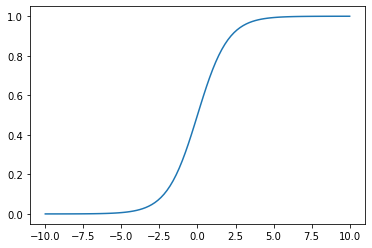

In [3]:
def sigmoid(z):
    return (1/(1+np.e**(-z)))

x = np.linspace(-10, 10, 101)
plt.plot(x, sigmoid(x))

1. Why is output of $\sigma$ in the interval (0, 1)?  
Because $e^x$ cannot be negative or 0. Also, as $z \to \pm\infty$, the value of the denomator tends to 0 and $\infty$. I.E. The range of the denomenator is $(1,\infty)$
2. Why the output of $\sigma$ cannot equal 0 or 1?  
For the same reason: $e^x$ cannot be negative or 0. For $\sigma$ to be equal to exactly 0 or 1, $e^{-z}$ must be equal to -1 or 0, respectively.
3. For what value of $z$ is $\sigma(z)$ = 0.5?  
When $z = 0$, the value for $\sigma(z) = 0.5$. This is because at $e^0=1$.
4. Show that $\sigma'(z) = \sigma(z)\cdot(1-\sigma(z))$

In order to help myself study later, I'm going to make this fairly verbose.  

Chain rule is used: $\frac{d}{dx}\left[f(g(x))\right] = f'\left[g(x)\right]\cdot g'(x)$

The derivate of $\sigma$ is as follows:  

\begin{aligned}
\frac{d}{dx} \sigma(x) &= \frac{d}{dx} \left[  \frac{1}{1+e^{-x}} \right] =\frac{d}{dx}(1+e^{-x})^{-1} \\
&=-1*(1+e^{-x})^{-2}(-e^{-x}) \\
&=\frac{-e^{-x}}{-(1+e^{-x})^{2}} \\
&=\frac{e^{-x}}{(1+e^{-x})^{2}} \\
&=\frac{1}{1+e^{-x}}  \frac{e^{-x}}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \frac{e^{-x} + (1 - 1)}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \frac{(1 + e^{-x}) - 1}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \left[ \frac{(1 + e^{-x})}{1+e^{-x}} - \frac{1}{1+e^{-x}} \right] \\
&=\frac{1}{1+e^{-x}}  \left[ 1 - \frac{1}{1+e^{-x}} \right] \\
&=\sigma(x) (1-\sigma(x)) \\
\end{aligned}

Use HR.csv data set and consider column ”left” to be the target variable with ”1” meaning
the person left the company and ”0” meaning that the person did not leave the company.

+ Investigate using various graphs/charts how given features affect this target variable.
+ Choose several features and build the sklearn logistic regression model predicting the
target variable ”left”.
+ Discuss the model performance (the confusion matrix and the classification report) on
the test set

In [4]:
data = pd.read_excel("../Data Sets/HR_Employee_Data.xlsx")
data

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

<AxesSubplot:>

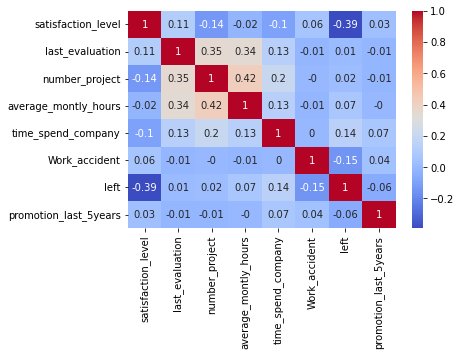

In [ ]:
data
#sns.pairplot(data)
corr_matrix = np.round(data.corr(), 2)
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")

In [ ]:
data = data[['satisfaction_level', 'Work_accident','time_spend_company','average_montly_hours','promotion_last_5years','salary','left']]
df = pd.concat([data.drop('salary', axis=1), pd.get_dummies(data['salary'],"salary")], axis=1)
df

,satisfaction_level,Work_accident,time_spend_company,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,0,3,157,0,1,0,1,0
1,0.80,0,6,262,0,1,0,0,1
2,0.11,0,4,272,0,1,0,0,1
3,0.72,0,5,223,0,1,0,1,0
4,0.37,0,3,159,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0,3,151,0,1,0,1,0
14995,0.37,0,3,160,0,1,0,1,0
14996,0.37,0,3,143,0,1,0,1,0
14997,0.11,0,4,280,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('left',axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=10_000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
model.score(X_train, y_train)

0.7663971997666472

In [ ]:
model.score(X_test, y_test)

0.7703333333333333

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2149,  162],
       [ 527,  162]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2311
           1       0.50      0.24      0.32       689

    accuracy                           0.77      3000
   macro avg       0.65      0.58      0.59      3000
weighted avg       0.73      0.77      0.74      3000



It seems to me like the most important is the false negative; predicting that an employee would stay when they in fact leave. Consequently, a high f1 score for the negatives seems accceptable to me.